Plots:
1. Heatmap for every unit (for Pearsonr trial average and STTC trial average)
2. ACF line plot average over units 
3. ACF line plot for every unit 

In [1]:
import pandas as pd
import numpy as np
#import csv
#import random
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
current_wd = os.getcwd()
os.chdir(os.path.abspath("..\\..\\..\\isttc\\scripts"))
#from calculate_acf import acf_pearsonr_trial_avg, acf_sttc_trial_avg, acf_sttc_trial_concat
from cfg_global import project_folder_path
os.chdir(current_wd)

### Get data

In [2]:
results_folder = project_folder_path + 'results\\monkey\\fixation_period_1000ms_no_empty\\'

In [21]:
area = 'pfdl' # pfp

In [22]:
n_lags = 20
acf_cols = ['acf_' + str(i) for i in range(n_lags)]

acf_pearsonr_trial_avg_df = pd.read_pickle(results_folder + 'binned\\' + area + '\\acf\\acf_pearsonr_trial_avg_1000ms_no_empty_50ms_20lags_df.pkl')
acf_matrix_pearsonr_trial_avg_l = np.load(results_folder + 'binned\\' + area + '\\acf\\acf_matrix_pearsonr_trial_avg_1000ms_no_empty_50ms_20lags_df.npy')

acf_sttc_trial_avg_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_avg_1000ms_no_empty_50ms_20lags_df.pkl')
acf_matrix_sttc_trial_avg_l = np.load(results_folder + 'non_binned\\' + area + '\\acf\\acf_matrix_sttc_trial_avg_1000ms_no_empty_50ms_20lags_df.npy')

acf_sttc_trial_concat_df = pd.read_pickle(results_folder + 'non_binned\\' + area + '\\acf\\acf_sttc_trial_concat_1000ms_no_empty_50ms_20lags_df.pkl')

### Plot

In [13]:
save_fig=True

##### ACF per unit 

In [23]:
fig_folder = results_folder + 'acf_line_plots\\' + area + '\\'

for acf_idx in range(len(acf_pearsonr_trial_avg_df)):

    fig, axes = plt.subplots(2,3, figsize=(14,8), sharey='row')
    plt.subplots_adjust(hspace=0.4, wspace=0.2)
    
    axes[0,0].plot(acf_pearsonr_trial_avg_df[acf_cols].values[acf_idx, :], c='k', lw=0.5 ,marker='o', markersize='4')
    axes[0,1].plot(acf_sttc_trial_avg_df[acf_cols].values[acf_idx, :], c='k', lw=0.5 ,marker='o', markersize='4')
    axes[0,2].plot(acf_sttc_trial_concat_df[acf_cols].values[acf_idx, :], c='k', lw=0.5 ,marker='o', markersize='4')
    
    axes[1,0].plot(np.linspace(0, 19, 20).astype(int)[1:],
                   acf_pearsonr_trial_avg_df[acf_cols].values[acf_idx, 1:], c='k', lw=0.5 ,marker='o', markersize='4')
    axes[1,1].plot(np.linspace(0, 19, 20).astype(int)[1:],
                   acf_sttc_trial_avg_df[acf_cols].values[acf_idx, 1:], c='k', lw=0.5 ,marker='o', markersize='4')
    axes[1,2].plot(np.linspace(0, 19, 20).astype(int)[1:],
                   acf_sttc_trial_concat_df[acf_cols].values[acf_idx, 1:], c='k', lw=0.5 ,marker='o', markersize='4')
    
    axes[0,0].set_title('ACF pearsonr trial avg')
    axes[0,1].set_title('ACF sttc trial avg')
    axes[0,2].set_title('ACF sttc trial concat')
    
    fig.suptitle('acf, unit ' + str(acf_idx))
    
    for ax in axes.flat:
        ax.set_ylabel('ACF (a.u.)')
        ax.set_xlabel('Time (ms)')
        ax.set_xticks(np.linspace(0, 20, 11).astype(int))
        ax.set_xticklabels(np.linspace(0, 1000, 11).astype(int))
        ax.set_xlim([0,20])
    
    sns.despine()

    if save_fig:
        fig.savefig(fig_folder + 'acf_1000ms_no_empty_50ms_20lags_unit_' + str(acf_idx) + '.png' , bbox_inches='tight')
    plt.close()

##### Mean ACF per area

In [19]:
def plot_acf(acf_average_trial_df_, acf_cols_, metric_, save_fig_=False, save_folder_=None):
    n_nans_acf_average_trial_df= acf_average_trial_df_.isna().any(axis=1).sum()

    fig, axes = plt.subplots(1,2, figsize=(12,4))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    
    for acf_ in range(len(acf_average_trial_df_)):
        axes[0].plot(acf_average_trial_df_[acf_cols_].values[acf_, :], lw=0.5, c='k', alpha=0.1)
    axes[0].plot(np.nanmean(acf_average_trial_df_[acf_cols_].values, axis=0), c='r', lw=0.5 ,marker='o', markersize='5')
    axes[0].axhline(y=0, lw=0.5, color='k')
    # # axes[0].axhline(y=1/np.e, lw=0.5, color='k')
    # axes[0].set_xticks(np.linspace(0, 20, 11).astype(int))
    # axes[0].set_xticklabels(np.linspace(0, 1000, 11).astype(int))
    
    for acf_ in range(len(acf_average_trial_df_)):
        axes[1].plot(np.linspace(0, 19, 20).astype(int)[1:],
                     acf_average_trial_df_[acf_cols_].values[acf_, 1:], lw=0.5, c='k', alpha=0.1)
    axes[1].plot(np.linspace(0, 19, 20).astype(int)[1:],
                 np.nanmean(acf_average_trial_df_[acf_cols_].values, axis=0)[1:], c='r', lw=0.5 ,marker='o', markersize='5')
    axes[1].axhline(y=0, lw=0.5, color='k')
    # axes[1].axhline(y=1/np.e, lw=0.5, color='k')
    # axes[1].set_xticks(np.linspace(0, 20, 11).astype(int))
    # axes[1].set_xticklabels(np.linspace(0, 1000, 11).astype(int))
    # axes[1].set_xlim([1,19])
    axes[1].set_ylim([-0.2,0.6])
    
    fig.suptitle('acf, metric ' + metric_ + ', num acf = ' + str(len(acf_average_trial_df_)) + '\n with nans ' 
                 + str(n_nans_acf_average_trial_df))

    for ax in axes.flat:
        ax.set_ylabel('ACF (a.u.)')
        ax.set_xlabel('Time (ms)')
        ax.set_xticks(np.linspace(0, 20, 11).astype(int))
        ax.set_xticklabels(np.linspace(0, 1000, 11).astype(int))
        ax.set_xlim([0,20])
    
    sns.despine()
    
    if save_fig_:
        fig.savefig(save_folder_ + 'acf ' + metric_ + '_1000ms_no_empty_50ms_20lags.png' , bbox_inches='tight')

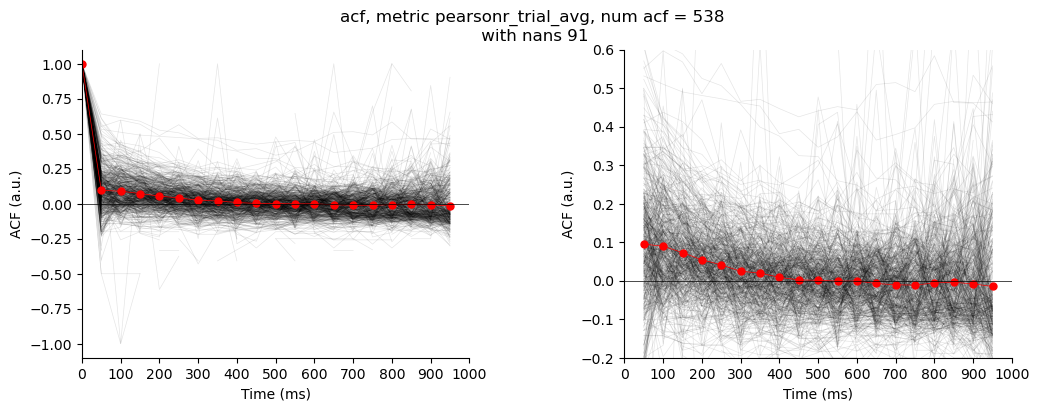

In [15]:
fig_folder = results_folder + 'binned\\' + area + '\\acf\\'
plot_acf(acf_pearsonr_trial_avg_df, acf_cols, 'pearsonr_trial_avg', save_fig, fig_folder)

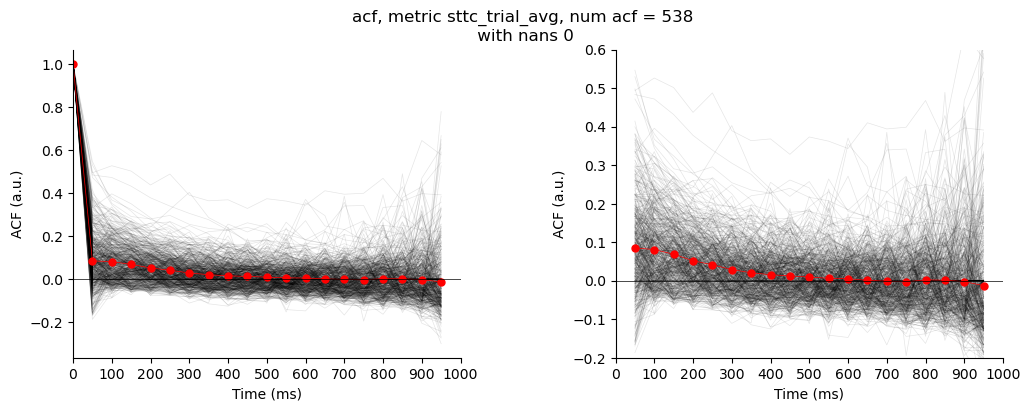

In [16]:
fig_folder = results_folder + 'non_binned\\' + area + '\\acf\\'
plot_acf(acf_sttc_trial_avg_df, acf_cols, 'sttc_trial_avg', save_fig, fig_folder)

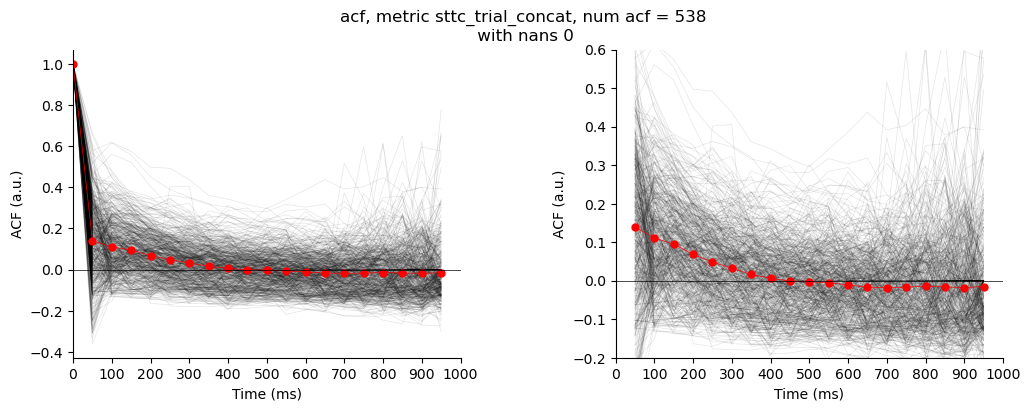

In [17]:
fig_folder = results_folder + 'non_binned\\' + area + '\\acf\\'
plot_acf(acf_sttc_trial_concat_df, acf_cols, 'sttc_trial_concat', save_fig, fig_folder)

##### Heatmaps for trial avg

In [6]:
def plot_acf_heatmap(acf_matrix_, metric_, unit_id_, save_folder_):
    fig, axes = plt.subplots(1,1,figsize=(6,6))
    acf_matrix_plot = acf_matrix_.T + acf_matrix_
    np.fill_diagonal(acf_matrix_plot, 1)
    sns.heatmap(acf_matrix_plot, ax=axes)
    axes.set_aspect('equal', adjustable='box')
    axes.set_title('unit ' + str(unit_id_) + ', ' + metric_)
    fig.savefig(fig_folder + 'unit_' + str(unit_id_), bbox_inches='tight')
    plt.close()

In [ ]:
fig_folder = results_folder + 'binned\\' + area + '\\acf\\acf_matrices\\'
for idx, acf_matrix in enumerate(acf_matrix_pearsonr_trial_avg_l):
    unit_id = int(acf_pearsonr_trial_avg_df.iloc[idx]['unit_id'])
    plot_acf_heatmap(acf_matrix, 'Pearson trial_avg', unit_id, fig_folder)

In [18]:
fig_folder = results_folder + 'non_binned\\' + area + '\\acf\\acf_matrices\\'
for idx, acf_matrix in enumerate(acf_matrix_sttc_trial_avg_l):
    unit_id = int(acf_sttc_trial_avg_df.iloc[idx]['unit_id'])
    plot_acf_heatmap(acf_matrix, 'STTC trial_avg', unit_id, fig_folder)